# Data Incubator Proposal

Challenge:
2016 reported that there are 2.1 billion smartphone users in the world and this number is projected to grow to 3.3 billion by 2020(https://www.statista.com/statistics/330695/number-of-smartphone-users-worldwide/) ! With  massive,fast growing companies like Snapchat, Instagram, and Uber having their entire business operating on mobile, delivering the best mobile experience to their customers is important and effects hundreds of millions in revenue. 

As businesses and enterprises are being demanded to offer mobile applications and services, delivering a great mobile experience is expensive and challenging. 

## Proposal: 
Social Media responses and mobile app reviews offer valuable data and insight into what their users are saying about their mobile app experience and features they like or dislike.

* A challenge for large popular apps like Snapchat and Uber is that they have over 500,000 reviews submitted and rising. 

* I propose collecting and analyze customer review data overtime as a way for mobile operated businesses, whether small or large, can analyze large volumes of customer feedback and quickly gain insight into improving their mobile app experience. 

## Data Sources: 
The various sources I will scrape to collect mobile app reviews
    * iTunes Search Api: scrapping and aggregating app reviews over time from their RSS feed
    * [Coming Soon]Tweets to company's customer service
    * [Coming Soon] Google Play Developer API: Getting App Review from Google Play store 

## Analysis:
The analysis I plan to conduct on mobile app reviews
* `Sentiment Analysis` and `Keyterm Extraction`
    * I plan to explore not only ``predicting and analyzing sentiment`` of mobile app reviews, but also analyze what are the ``features/key terms`` that are associated with a positive or bad mobile experience. 
* Understanding and quickly learning what features/experiences resulted in a bad review or rating will enable businesses and developers to quickly analyze and enhance their mobile experience.

## Signifigance:
Mobile operated businesses like Snapchat and Uber, or even independent iOS developers, can leverage sentiment analysis and keyterm extraction to understand what features their users like or dislike. For apps that are popular and have hundreds of thousands of reviews, analyzing customer reviews with machine learning can quickly analyze user sentiment over time and enable businesses to deliver great mobile experiences.

Also, there are no available datasets(to my knowledge) that has aggregated mobile app reviews, so this enables a new opportunity for sentiment analysis and key-term extraction analytics to deliver great insights to businesses. 
* Also with the iTunes Search api open and accessible, we have the following attributes to analyze as well:
    * We can build a model to predict mobile app rating(1-5) based on customer review
    * We can compare sentiment of app reviews by different companies, (i.e. US vs UK)
    * We can track sentiment over app versions, and get quick understanding if features from a certain update were "good" or "bad"
  
You can view my preliminary data analysis using this link here: https://github.com/interactivetech/Data-Incubator-Proposal/blob/master/Data%20Incubator%20Proposal%20Final.ipynb

# Exploratory Analysis
* Here I aggregate and clean  Uber and Snapchat app reviews from the past week using the iTunes Search api.
* Note: I used Shazam app-review scraping repository to handle collecting iOS app reviews: (https://github.com/shazam/app-store-reviews-and-translations)
* I then compute and plot sentiment of Uber and Snapchat reviews overtime showcasing how we can get up-to-date and historical view of customer satisfaction. 

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import textacy
import seaborn as sns
from pandas.io.json import json_normalize #package for flattening json in pandas df
from tqdm import tqdm
from textblob.sentiments import NaiveBayesAnalyzer
%matplotlib inline

import textacy
from textacy.keyterms import textrank, sgrank
from textacy.lexicon_methods import emotional_valence

from datetime import datetime
from dateutil.parser import parse


## Data Cleaning

In [2]:
def parse_all_json_logs(path):
    js = []
    for log in os.listdir(path):
        print(os.path.join(path,log) )
        f = open(os.path.join(path,log))
        lines = f.readlines()
        print("Number of reviews: ",len(lines))
        f.close()
        reviews = [json.loads(i) for i in lines]
        js+=reviews
    return js

In [ ]:
# js = f.readlines()
# f.close()

In [ ]:
# uber_reviews = [json.loads(i) for i in js]

In [3]:
reviews = parse_all_json_logs('app-reviews-with-translate/json/')

app-reviews-with-translate/json/reviews-20180724.log
Number of reviews:  1038
app-reviews-with-translate/json/reviews-20180730.log
Number of reviews:  2228
app-reviews-with-translate/json/reviews-20180731.log
Number of reviews:  2118
app-reviews-with-translate/json/reviews-20180725.log
Number of reviews:  1321
app-reviews-with-translate/json/reviews-20180727.log
Number of reviews:  2090
app-reviews-with-translate/json/reviews-20180726.log
Number of reviews:  1718
app-reviews-with-translate/json/reviews-20180805.log
Number of reviews:  428
app-reviews-with-translate/json/reviews-20180804.log
Number of reviews:  917
app-reviews-with-translate/json/reviews-20180801.log
Number of reviews:  1887
app-reviews-with-translate/json/reviews-20180803.log
Number of reviews:  2038
app-reviews-with-translate/json/reviews-20180802.log
Number of reviews:  1973
app-reviews-with-translate/json/reviews-20180728.log
Number of reviews:  2168
app-reviews-with-translate/json/reviews-20180729.log
Number of rev

In [ ]:
reviews[10]

### Convert json to a flat table and load it into pandas
* json_normalize: Normalize" semi-structured JSON data into a flat table

In [4]:
# %%timeit
# pd.DataFrame(reviews[0])
df = json_normalize(reviews[0])
for review in tqdm(reviews[1:]):
    df = pd.concat([df,json_normalize(review)],axis=0)

100%|██████████| 22023/22023 [03:17<00:00, 111.78it/s]


## ToDo(Andrew):
### 1. convert rating column to integers
### 2. write function to compute and save sentiment for each review and save as new column
### 3. write function to compute and save topics or keywords and save as new column
### 4. Easily graph rating and sentiment over countries

## Clean dataset

In [5]:
df['rating']=df['rating'].astype(int)

In [6]:
 Months = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04':'Apr', '05': 'May',\
                '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', \
                '10': 'Oct', '11': 'Nov', '12': 'Dec'}
month_name_to_num={v:k for k,v in Months.items()}
month_name_to_num


{'Jan': '01',
 'Feb': '02',
 'Mar': '03',
 'Apr': '04',
 'May': '05',
 'Jun': '06',
 'Jul': '07',
 'Aug': '08',
 'Sep': '09',
 'Oct': '10',
 'Nov': '11',
 'Dec': '12'}

In [7]:
def convert_month_name_to_num(string,d):
    for key in d.keys():
        print(key)
        if string.find(key)>-1:
            return string.replace(key,d[key])
#     '22/Jul/2018:07:46:06 -07:00'.replace('Jul','06')

def rreplace(s, old, new, occurrence):
    li = s.rsplit(old, occurrence)
    return new.join(li)

def clean_date_strings(text,d):
    print(text)
    a = convert_month_name_to_num(text,d)
    a = rreplace(a,':','',1)
#     print(a)
    return datetime.strptime(a,"%d/%m/%Y:%H:%M:%S %z")
    

In [9]:
%%time
df["t"]=df["t"].apply(lambda x:clean_date_strings(x,month_name_to_num) )

DatetimeIndex(['2018-07-24 17:52:01-07:00', '2018-07-24 16:16:10-07:00',
               '2018-07-24 15:37:07-07:00', '2018-07-24 14:53:59-07:00',
               '2018-07-24 14:47:02-07:00', '2018-07-24 11:24:06-07:00',
               '2018-07-24 06:20:20-07:00', '2018-07-24 03:27:48-07:00',
               '2018-07-24 01:33:38-07:00', '2018-07-24 07:57:01-07:00',
               ...
               '2018-07-29 06:37:28-07:00', '2018-07-29 05:49:33-07:00',
               '2018-07-29 05:34:45-07:00', '2018-07-29 05:27:29-07:00',
               '2018-07-29 05:05:14-07:00', '2018-07-29 03:22:26-07:00',
               '2018-07-29 00:27:21-07:00', '2018-07-29 11:59:17-07:00',
               '2018-07-29 07:49:22-07:00', '2018-07-29 21:22:22-07:00'],
              dtype='datetime64[ns, UTC-07:00]', length=22024, freq=None)
Jan
2018-07-24 17:52:01-07:00
Jan


AttributeError: 'Timestamp' object has no attribute 'find'

In [10]:
df['t']=pd.to_datetime(df['t'])

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
### 1)     polarity: negative vs. positive    (-1.0 => +1.0)

In [11]:
from textblob import TextBlob
def compute_sentiment(text):
    '''
    Hackish way to determine sentiment
    '''
    opinion = TextBlob(text)
    if opinion.sentiment[0] < 0.0:
        return ('Neg',opinion.sentiment[0] )
    else:
        return ('Pos',opinion.sentiment[0] )

def compute_sentiment_and_subjectivity(text):
    '''
    '''
    opinion = TextBlob(text)
    return opinion.sentiment

from textblob import Blobber

tb_nb = Blobber(analyzer=NaiveBayesAnalyzer())

def compute_sentiment_NB(text):
    '''
    Hackish way to determine sentiment
    '''
    opinion = tb_nb(text)
    if opinion.sentiment[1] > opinion.sentiment[2]:
        return ('Pos',opinion.sentiment[1] )
    else:
        return ('Neg',opinion.sentiment[2] )

def compute_sentiment_and_subjectivity_NB(text):
    '''
    '''
    opinion = tb_nb(text)    
    return opinion.sentiment


In [12]:
df[df['rating']==1].iloc[0]['content_en']

'IPhone 6s burning after 10 seconds of using snapchat. 0/20'

In [ ]:
# import nltk

In [13]:
tb_nb(df[df['rating']==1].iloc[0]['content_en']).sentiment

Sentiment(classification='neg', p_pos=0.4887234441099758, p_neg=0.5112765558900245)

In [ ]:
# nltk.download('punkt')

In [14]:
compute_sentiment_and_subjectivity(df[df['rating']==1].iloc[0]['content_en'])

Sentiment(polarity=0.0, subjectivity=0.0)

In [15]:
compute_sentiment_NB(df[df['rating']==1].iloc[0]['content_en'])

('Neg', 0.5112765558900245)

In [16]:
compute_sentiment_and_subjectivity_NB(df[df['rating']==1].iloc[0]['content_en'])

Sentiment(classification='neg', p_pos=0.4887234441099758, p_neg=0.5112765558900245)

In [17]:
%%time
df['sentiment_polarity']=df['content_en'].apply(lambda x:compute_sentiment_and_subjectivity(x)[0])

CPU times: user 20.7 s, sys: 145 ms, total: 20.9 s
Wall time: 22.2 s


In [18]:
%%time
df['sentiment_subjectivity']=df['content_en'].apply(lambda x:compute_sentiment(x)[1])

CPU times: user 19.9 s, sys: 131 ms, total: 20 s
Wall time: 21.1 s


In [19]:
df['sentiment_overall']=df['content_en'].apply(lambda x:compute_sentiment(x)[0])

In [20]:
%%time
tqdm.pandas()
df['sentiment_overall_nb']=df['content_en'].progress_apply(lambda x:compute_sentiment_NB(x)[0])

100%|██████████| 22024/22024 [00:24<00:00, 892.20it/s] 

CPU times: user 23.3 s, sys: 393 ms, total: 23.7 s
Wall time: 24.7 s


In [21]:
%%time
tqdm.pandas()
df['sentiment_positive_pol_nb']=df['content_en'].progress_apply(lambda x:compute_sentiment_and_subjectivity_NB(x)[1])

100%|██████████| 22024/22024 [00:24<00:00, 904.73it/s] 

CPU times: user 22.3 s, sys: 298 ms, total: 22.6 s
Wall time: 24.3 s


In [22]:
%%time
tqdm.pandas()
df['sentiment_negative_pol_nb']=df['content_en'].progress_apply(lambda x:compute_sentiment_and_subjectivity_NB(x)[2])

100%|██████████| 22024/22024 [00:25<00:00, 854.49it/s] 

CPU times: user 23.1 s, sys: 355 ms, total: 23.5 s
Wall time: 25.8 s


In [23]:
def return_dataframe_by_app_and_country(df,name,country='US'):
    return df[(df["app_name"]==name) & (df["country"]==country) ]
def return_dataframe_by_app(df,name):
    return df[(df["app_name"]==name) ]

In [ ]:
# return_dataframe_by_app(df,'GoogleMaps',country='CN')

In [ ]:
# uber_reviews = df[df["app_name"]=='Uber']
# snapchat_reviews = df[df["app_name"]=='Snapchat']

In [ ]:
# snapchat_reviews['rating']=snapchat_reviews['rating'].astype(int)

In [ ]:
# return_dataframe_by_app(df,'Whatsapp',country='FR')

### Overview of iTunes Search Api:
* We have access to many details about a submitted app review
* here is all the attributes we can play with

In [35]:
df[df['rating']==1].iloc[0]

app_name                                                              Snapchat
author                                                                  Ju0222
content                      IPhone 6s brûlant après 10 secondes d'utilisat...
content_en                   IPhone 6s burning after 10 seconds of using sn...
country                                                                     FR
id                                                                  2963238598
rating                                                                       1
store                                                                   iTunes
t                                                    2018-07-24 14:47:02-07:00
title                                                        Telephone brûlant
title_en                                                             Hot phone
version                                                             10.36.0.23
voteCount                                           

In [36]:
df[df["rating"]<4].iloc[20]['content_en']

'The update no longer displays the publications in chronological order is annoying. Not to mention the endless ads and sponsored publications.'

In [26]:
df['app_name'].iloc[0]

'Snapchat'

In [37]:
def plot_sentiment_over_time(df,rolling_mean=10,check_country=False):
    '''
    Assumes you use return_dataframe_by_app() function
    '''
    sentiment_df=df[['sentiment_positive_pol_nb','sentiment_negative_pol_nb','t']].set_index('t')
    app_name = df['app_name'].iloc[0]
    if check_country:
        country_code = df['country'].iloc[0]
        title_of_graph = ("Sentiment Polarity of %s iOS App Reviews Over Time (Country=%s)")%(app_name,country_code)
    else:
        title_of_graph = ("Sentiment Polarity of %s iOS App Reviews Over Time")%(app_name)
    ax = pd.rolling_mean(sentiment_df,rolling_mean).plot(title=title_of_graph)
    ax.set_xlabel('Time')
    ax.set_ylabel('Sentiment Polarity')
    ax.legend(['App Reviews submitted to iTunes'])
#     plt.savefig('Sentiment Polarity of Snapchat iOS App Reviews Over Time') 

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  if sys.path[0] == '':


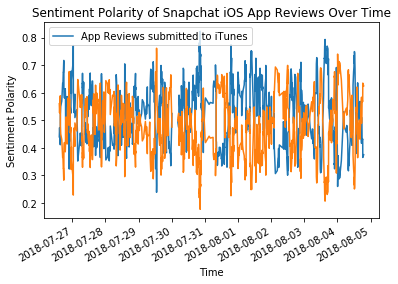

In [28]:
plot_sentiment_over_time(return_dataframe_by_app_and_country(df,'Snapchat'))

In [29]:
df['app_name'].value_counts()

Instagram     4858
Youtube       2774
Facebook      2739
Snapchat      2703
Spotify       2221
GoogleMaps    1399
Whatsapp      1317
Lyft          1074
Netflix       1031
Uber           846
Messanger      695
Waze           367
Name: app_name, dtype: int64

## Compute Histogram and statistics

In [38]:
return_dataframe_by_app(df,'Snapchat')['rating'].describe()

count    2703.000000
mean        2.763226
std         1.684437
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

In [31]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'A')

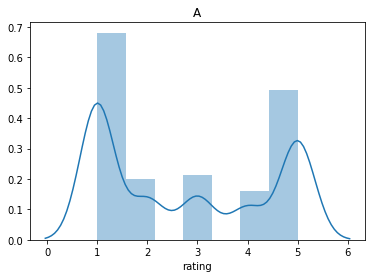

In [32]:
# return_dataframe_by_app(df,'Snapchat')['rating'].plot(kind='hist')
ax = sns.distplot(return_dataframe_by_app(df,'Snapchat')['rating'])
ax.set_title('A')

In [ ]:
# sns.countplot(return_dataframe_by_app(df,'Snapchat')['rating'])

In [33]:
range(df['country'].unique().shape[0]) 

range(0, 10)

In [39]:
def plot_ratings_across_apps(df):
    LEN = range(df['country'].unique().shape[0]) 
    sns.set(rc={'figure.figsize':(11.7*3,8.27*4)})
    for i in range(df['app_name'].unique().shape[0]) :
        name = df['app_name'].unique()[i]
#         app_name=name
        plt.subplot(6, 6, i+1)
    #     title_of_graph = ("Rating of %s iOS App Reviews Over Time (Country=%s)")%(app_name,country)
#         print(name)
        ax = sns.distplot(return_dataframe_by_app_and_country(df,name)['rating'],bins=5)
        ax.set_title(name)

In [47]:
df.groupby('app_name')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
app_name,,,,,,,,
Facebook,2739.0,2.628697,1.728397,1.0,1.0,2.0,5.0,5.0
GoogleMaps,1399.0,4.061472,1.489283,1.0,3.0,5.0,5.0,5.0
Instagram,4858.0,3.005558,1.688463,1.0,1.0,3.0,5.0,5.0
Lyft,1074.0,4.027002,1.516058,1.0,3.0,5.0,5.0,5.0
Messanger,695.0,2.103597,1.438730,1.0,1.0,1.0,3.0,5.0
Netflix,1031.0,2.947624,1.521743,1.0,1.0,3.0,4.0,5.0
Snapchat,2703.0,2.763226,1.684437,1.0,1.0,2.0,5.0,5.0
Spotify,2221.0,3.763170,1.537142,1.0,3.0,5.0,5.0,5.0
Uber,846.0,2.934988,1.809058,1.0,1.0,3.0,5.0,5.0


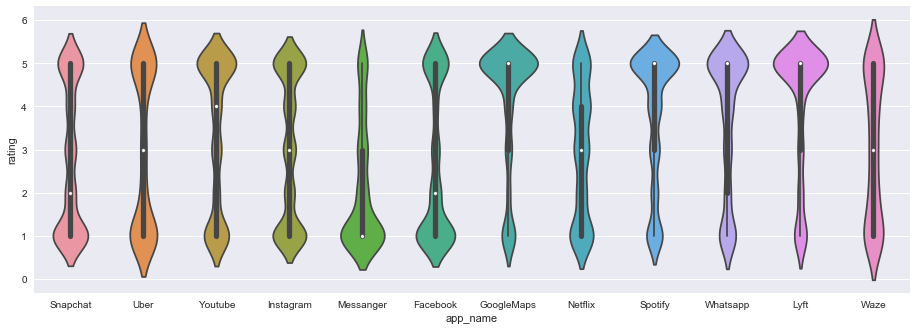

In [76]:
sns.set(rc={'figure.figsize':(15.7,5.27)})
sns.violinplot(x='app_name',y='rating',data=df)
plt.savefig("Average Rating accross all top 12.png")

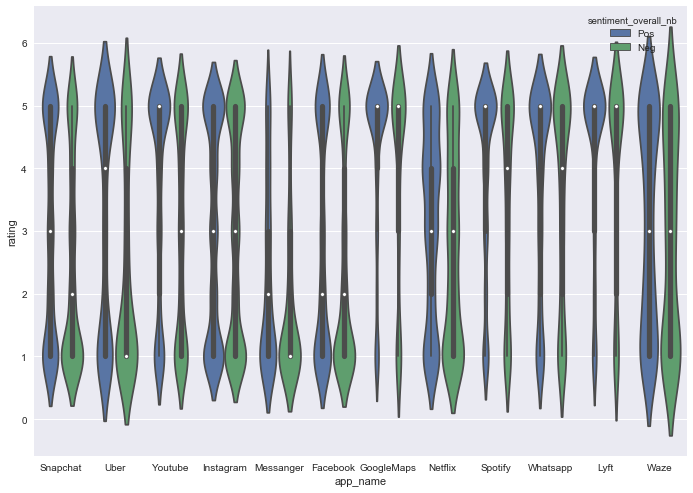

In [42]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x='app_name',y='rating',data=df,hue='sentiment_overall_nb')

## Who is the best rated social media app

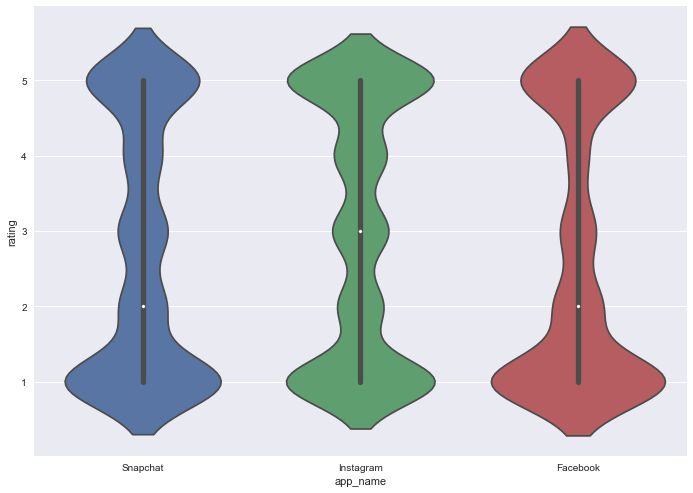

In [45]:
sns.violinplot(x='app_name',y='rating',
               data=df[ (df['app_name']=='Snapchat') | (df['app_name']=='Instagram') | (df['app_name']=='Facebook') ])
plt.savefig("Average Rating accross top Social Media iOS Apps.png")

In [ ]:
sns.violinplot(x='app_name',y='rating',hue='sentiment_overall_nb',
               data=df[ (df['app_name']=='Snapchat') | (df['app_name']=='Instagram') | (df['app_name']=='Facebook') ])



In [ ]:
# sns.violinplot(x='app_name',y='sentiment_polarity_',
#                data=df[ (df['app_name']=='Snapchat') | (df['app_name']=='Instagram') | (df['app_name']=='Facebook') ])

In [ ]:
# #sentiment_positive_pol_nb
# sns.violinplot(x='app_name',y='sentiment_negative_pol_nb',
#                data=df[ (df['app_name']=='Snapchat') | (df['app_name']=='Instagram') | (df['app_name']=='Facebook') ])


# Who is the best rated ride sharing app

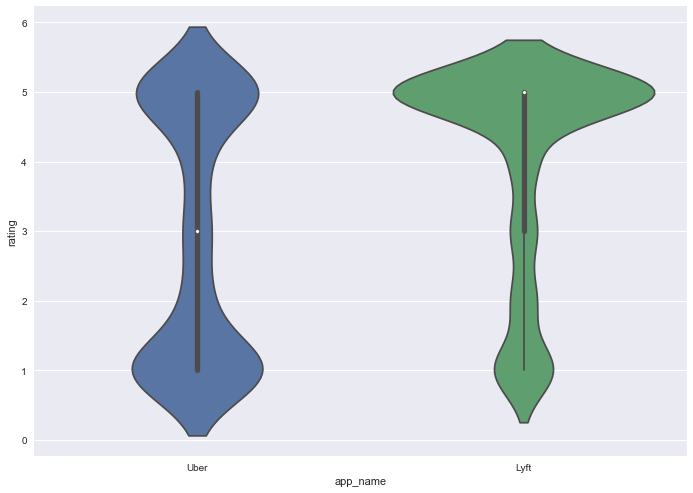

In [46]:
sns.violinplot(x='app_name',y='rating',
               data=df[ (df['app_name']=='Uber') | (df['app_name']=='Lyft')  ])
plt.savefig("Average Rating accross top Ride Sharing iOS Apps.png")


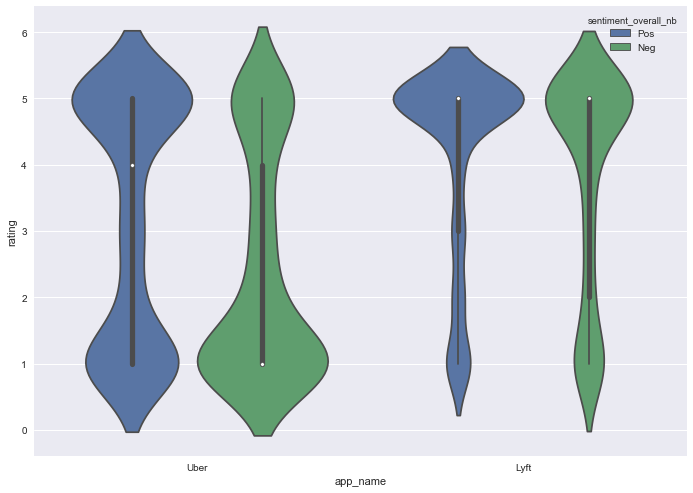

In [48]:
sns.violinplot(x='app_name',y='rating',hue='sentiment_overall_nb',
               data=df[ (df['app_name']=='Uber') | (df['app_name']=='Lyft')  ])

In [ ]:
# sns.violinplot(x='app_name',y='sentiment_polarity',
#                data=df[ (df['app_name']=='Uber') | (df['app_name']=='Lyft')  ])

# Who is the best messaging app

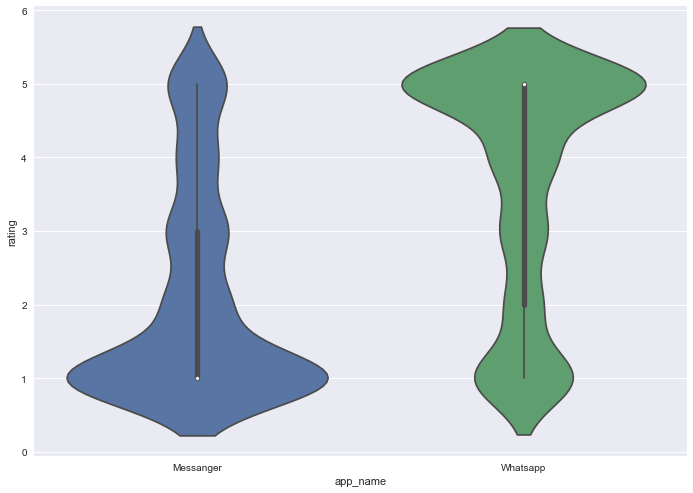

In [49]:
sns.violinplot(x='app_name',y='rating',
               data=df[ (df['app_name']=='Whatsapp') | (df['app_name']=='Messanger')  ])

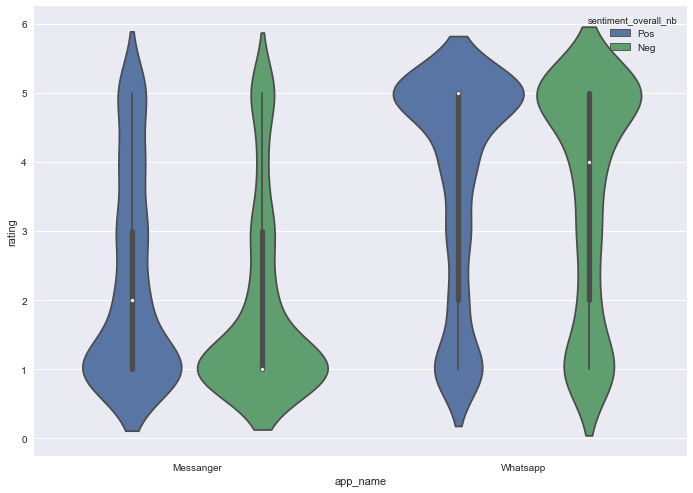

In [50]:
sns.violinplot(x='app_name',y='rating',hue='sentiment_overall_nb',
               data=df[ (df['app_name']=='Whatsapp') | (df['app_name']=='Messanger')  ])

In [ ]:
 # sns.violinplot(x='app_name',y='sentiment_polarity',
#                data=df[ (df['app_name']=='Whatsapp') | (df['app_name']=='Messanger')  ])

# What is the best rated video content app

In [ ]:
sns.violinplot(x='app_name',y='rating',
               data=df[ (df['app_name']=='Netflix') | (df['app_name']=='Youtube')  ])



In [ ]:
sns.violinplot(x='app_name',y='rating',hue='sentiment_overall_nb',
               data=df[ (df['app_name']=='Netflix') | (df['app_name']=='Youtube')  ])



In [ ]:
# sns.violinplot(x='app_name',y='sentiment_polarity',
#                data=df[ (df['app_name']=='Netflix') | (df['app_name']=='Youtube')  ])



In [55]:
def plot_ratings_across_country(df,name,use_hue=False):
    LEN = range(df['country'].unique().shape[0]) 
    sns.set(rc={'figure.figsize':(11.7*3,8.27*4)})
    for i in range(df['country'].unique().shape[0]) :
        country = df['country'].unique()[i]
        app_name=name
        plt.subplot(5, 5, i+1)
    #     title_of_graph = ("Rating of %s iOS App Reviews Over Time (Country=%s)")%(app_name,country)
        if use_hue:
            ax = sns.countplot(x='rating',hue='sentiment_overall_nb',data=return_dataframe_by_app_and_country(df,name,country=country))
        else:
            ax = sns.countplot(return_dataframe_by_app_and_country(df,name,country=country)['rating'])
        ax.set_title(country)

## Snapchat Ratings across  10 countries

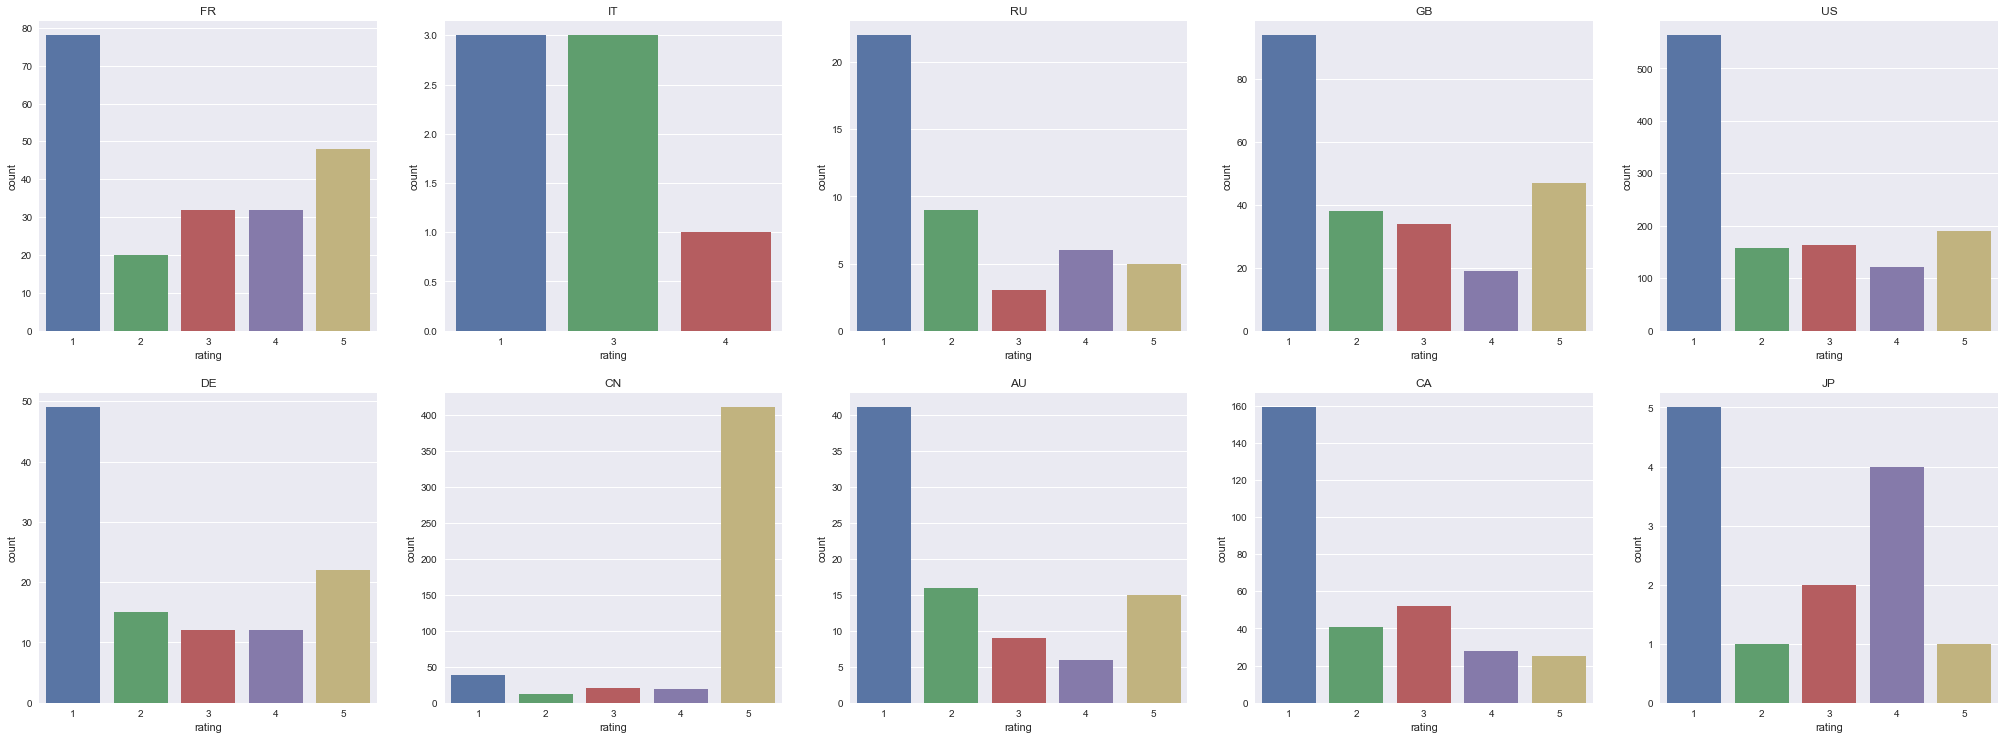

In [56]:
plot_ratings_across_country(df,'Snapchat')

In [ ]:
# sns.countplot(x='rating',data=return_dataframe_by_app(df,'Snapchat'),hue='sentiment_overall_nb')

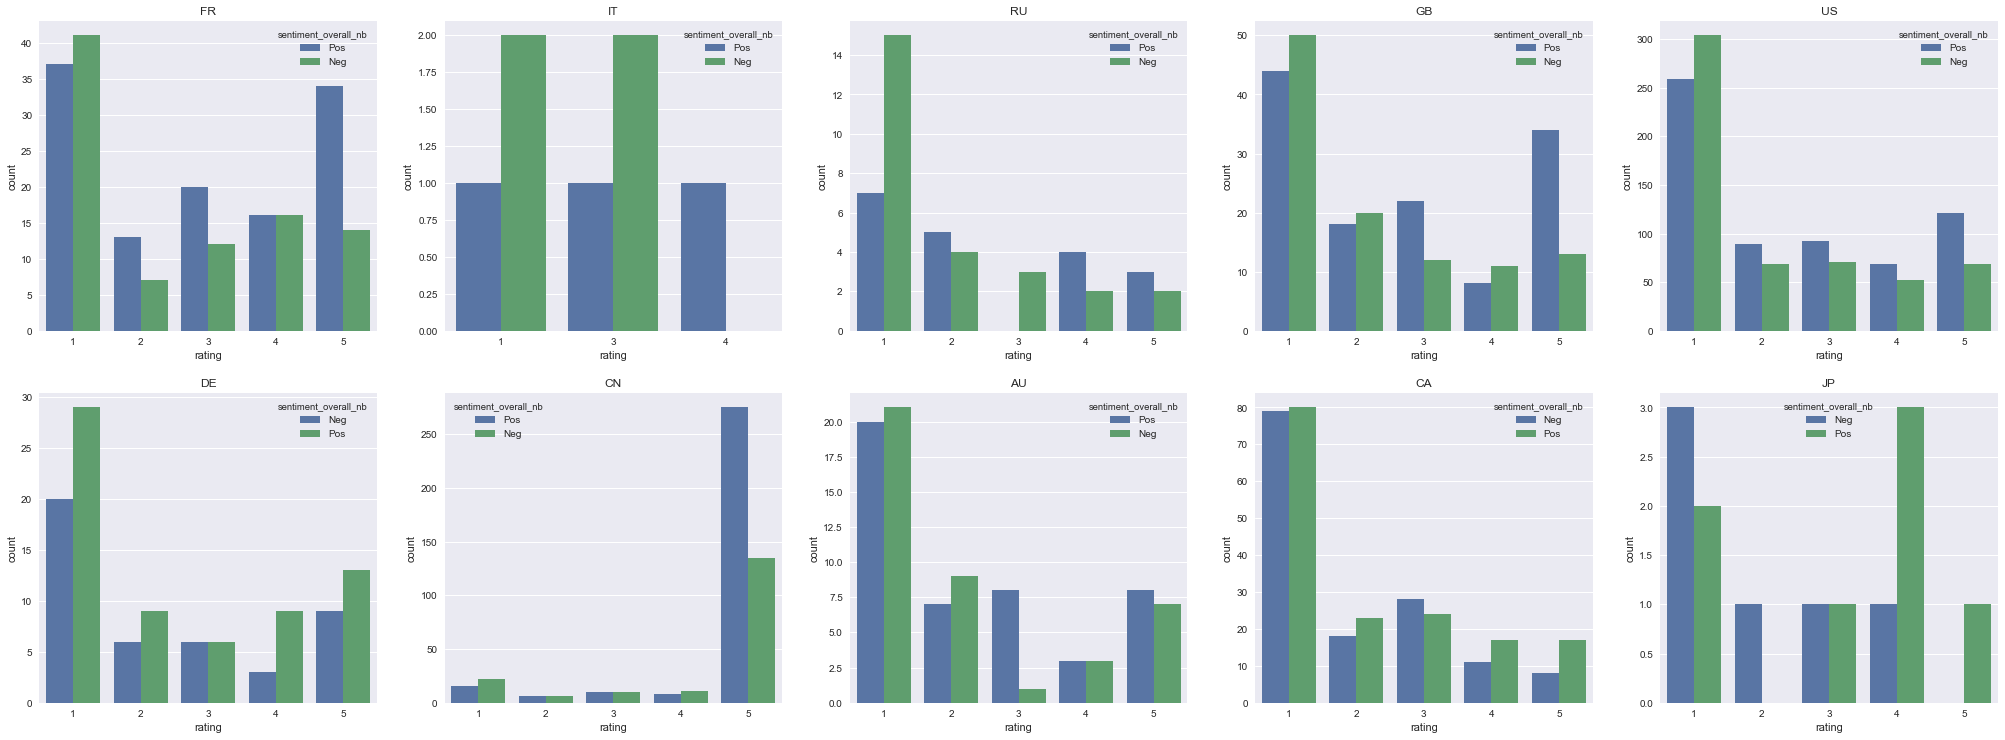

In [57]:
plot_ratings_across_country(df,'Snapchat',use_hue=True)

In [ ]:
# return_dataframe_by_app(df,'Snapchat',country='AU')[
#     (return_dataframe_by_app(df,'Snapchat',country='AU')['rating']==5) & 
#     (return_dataframe_by_app(df,'Snapchat',country='AU')['sentiment_overall_nb']=='Neg')]

## Social Media App Ratings Across Each Country

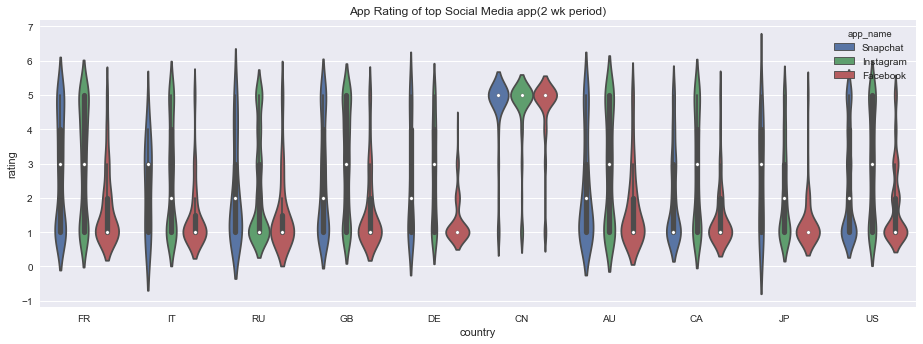

In [75]:
sns.set(rc={'figure.figsize':(15.7,5.27)})

ax=sns.violinplot(x='country',y='rating',data=df[ (df['app_name']=='Snapchat') | (df['app_name']=='Instagram') | (df['app_name']=='Facebook') ],hue='app_name')
ax.set_title("App Rating of top Social Media app(2 wk period)")
plt.savefig("App Rating of top Social Media app(2 wk period).png")


## App rating of Navigation Apps over 10 countries

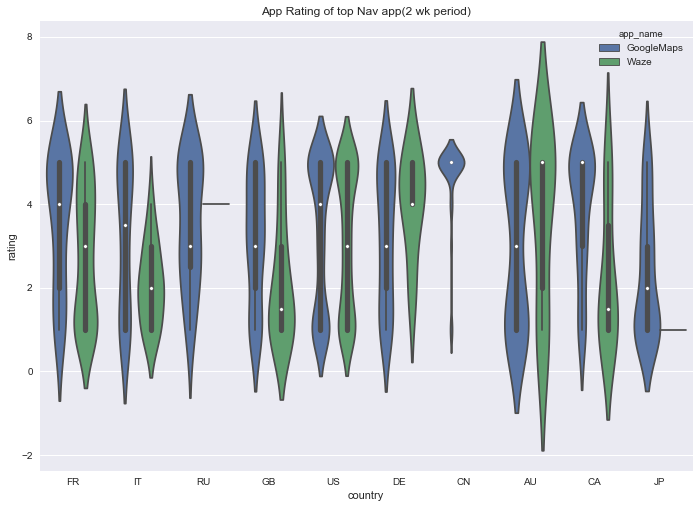

In [68]:
ax=sns.violinplot(x='country',y='rating',data=df[ (df['app_name']=='GoogleMaps') | (df['app_name']=='Waze') ],hue='app_name')
ax.set_title("App Rating of top Nav app(2 wk period)")
plt.savefig("App Rating of top Nav app(2 wk period).png")

## Facebook Ratings across  10 countries

In [ ]:
plot_ratings_across_country(df,'Facebook')

In [ ]:
sns.violinplot(x='country',y='rating',data=df[df['app_name']=='Facebook'])

In [ ]:
plot_ratings_across_country(df,'Facebook',use_hue=True)

## Instagram Ratings across  10 countries

In [ ]:
plot_ratings_across_country(df,'Instagram')

In [ ]:
sns.violinplot(x='country',y='rating',data=df[df['app_name']=='Instagram'])

In [ ]:
plot_ratings_across_country(df,'Instagram',use_hue=True)

In [ ]:
# Average rating across all apps, across all countries

In [ ]:
sns.jointplot(x="rating", y="sentiment_negative_pol_nb", 
              data=df);

## Most Frequent words given ratings
* can do this by getting all 1 star ratings for a given app, computer frequency, and 

In [ ]:
corpus = textacy.Corpus(lang='en')

In [ ]:
one_star_ratings = df[(df['app_name']=='Snapchat')&(df['rating']==1)]

In [ ]:
# one_star_ratings

In [ ]:
for review in tqdm(one_star_ratings['content_en'].as_matrix()):
    corpus.add_text(review)

In [ ]:
corpus[0].text

In [ ]:
'this' in corpus[0].text

In [ ]:
textacy.text_utils.keyword_in_context(corpus[0].text,'Thank')

## Make function to search for reviews from keyword
# NOTE: Dataframe must be same source as corpus was made!

In [ ]:
import string

In [ ]:
'I am here'=='I am here'

In [77]:

def extract_corpus_from_df(df):
    corpus = textacy.Corpus(lang='en')
    for review in tqdm(df['content_en'].as_matrix()):
      corpus.add_text(review)
    return corpus
def search_corpus_simple(corpus,df,keyword):
    '''
    Should return reviews
    '''
#     corpus = textacy.Corpus(lang='en')
    
    results=[]
    res = corpus.get(lambda x:keyword in x.text)
    for doc in tqdm(res):
      results.append(doc)
    
    indicies=[]
    for r in tqdm(results):
        for i in range(len(df)):
            if r.text==df.iloc[i]['content_en'] and (i not in indicies) :
                indicies.append(i)
#                 break
    return indicies
                
    
# Types of queries
# AND 'snap map' 'bad'
# OR  'snap map' 'stories'
def search_corpus_advanced():
    '''
    To Do: Build advanced querying like inverted index assignment
    '''
    return
    

In [79]:
corpus = extract_corpus_from_df(return_dataframe_by_app_and_country(df,'Snapchat'))
l = search_corpus_simple(corpus,return_dataframe_by_app_and_country(df,'Snapchat'),'batter')

100%|██████████| 1195/1195 [00:25<00:00, 46.58it/s]
18it [00:00, 361.77it/s]
100%|██████████| 18/18 [00:06<00:00,  2.87it/s]


In [80]:
for i in return_dataframe_by_app_and_country(df,'Snapchat').iloc[l]['content_en'].as_matrix():
    print(i)
    print()

Snapchat has been a very efficient way to message friends. It saves memory and the filters are a lot of fun. Snapchat has a lot of updates  making it hard to learn how to use it. It differs every day. That is good and bad for different reasons. Most the updates just take a little time to get used to, but are for the better. Only one or two updates have really been a pain, and it drains your battery really fast.

Snapchat is a truly useful tool, and helps with the need of sending pictures as texts without using much memory. I recommend Snapchat to anyone looking for a fun app to communicate in a new and different way.

This is a very good app. I text and contact friends everyday on here. But the downfall is it destroys your iPhones battery life extremely fast. Apple and Snapchat need to work to fix this issue.

This most recent update draws a HUGE amount of battery, even if you're just chatting (not taking pictures). So much so that just leaving snapchat open not doing anything causes t

## What do the one star reviews saying about batteries?

In [ ]:
# one_star_ratings.iloc[l]['sentiment_overall_nb'].value_counts()

## What do one star snapchat reviews say about filters

In [ ]:
# one_star_ratings.iloc[search_corpus_simple(corpus,one_star_ratings,'filter')]['sentiment_overall_nb'].value_counts()

## Overall rating and sentiment about Snapchat's Battery

In [81]:
corpus = extract_corpus_from_df(return_dataframe_by_app(df,'Snapchat'))
r = return_dataframe_by_app(df,'Snapchat').iloc[search_corpus_simple(corpus,return_dataframe_by_app(df,'Snapchat'),'batter')]

100%|██████████| 2703/2703 [00:52<00:00, 51.16it/s]
53it [00:00, 463.70it/s]
100%|██████████| 53/53 [00:44<00:00,  1.20it/s]


In [84]:
len(r)

53

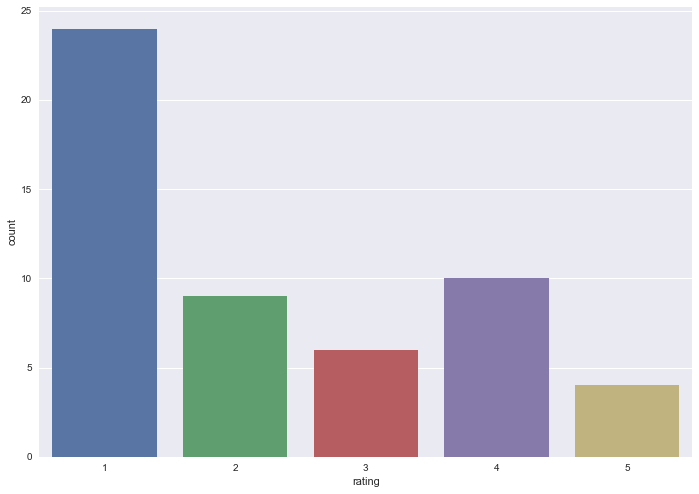

In [89]:
sns.countplot( x= 'rating',data=r)
ax.set_title("Ratings of Reviews with Keyword \"Battery\"")
plt.savefig("Ratings of Reviews with Keyword \"Battery\".png")

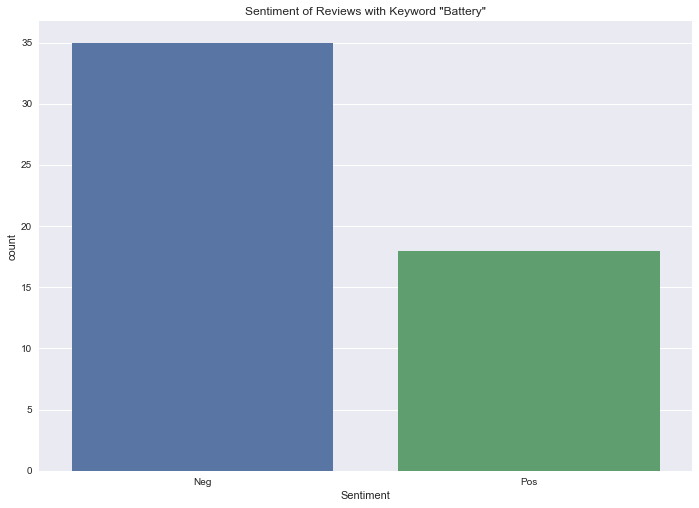

In [88]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.countplot( x='sentiment_overall_nb',data=r)
ax.set_xlabel("Sentiment")
ax.set_title("Sentiment of Reviews with Keyword \"Battery\"")
plt.savefig("Sentiment of Reviews with Keyword \"Battery\".png")


In [ ]:
# sns.countplot( x= 'rating',data=r,hue='sentiment_overall_nb')

## Overall rating and sentiment about Snapchat's Lens Feature

In [ ]:
# corpus

In [90]:
corpus = extract_corpus_from_df(return_dataframe_by_app(df,'Snapchat'))
r = return_dataframe_by_app(df,'Snapchat').iloc[search_corpus_simple(corpus,return_dataframe_by_app(df,'Snapchat'),'lens')]

100%|██████████| 2703/2703 [01:06<00:00, 40.59it/s]
8it [00:00, 66.40it/s]
100%|██████████| 8/8 [00:06<00:00,  1.28it/s]


In [97]:
r['rating'].value_counts()

3    3
5    2
1    2
2    1
Name: rating, dtype: int64

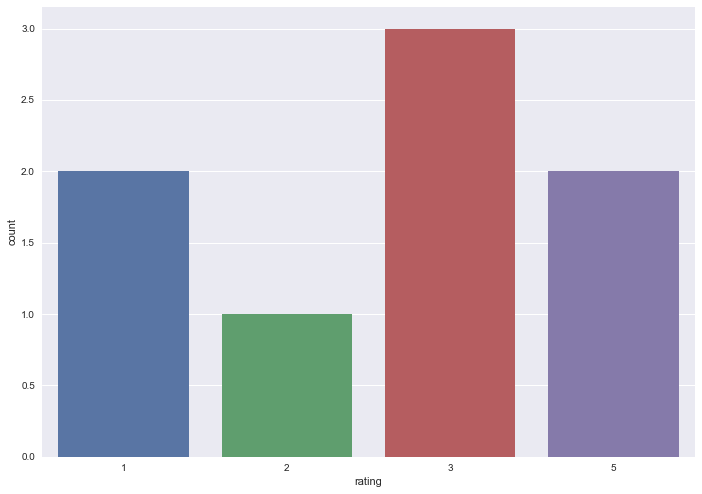

In [91]:
sns.countplot( x= 'rating',data=r)

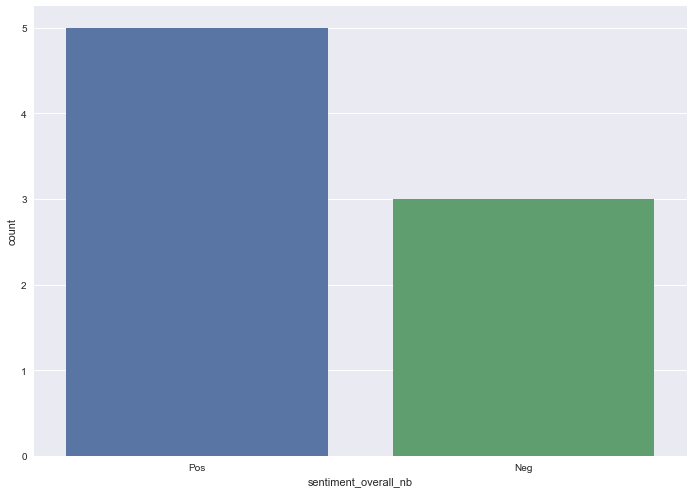

In [93]:
sns.countplot( x= 'sentiment_overall_nb',data=r)

In [ ]:
# df.groupby('author')

In [ ]:
for i in r['content_en'].iloc[:10].as_matrix():
    print(i)
    print()

In [ ]:
# sns.countplot()

## What are the general topics Snapchat reviews < 3: 
* 1. Extract 20 topics using LDA
* extract reviews that have the topic and see ratings, sentiment

In [98]:
from textacy import Vectorizer

In [ ]:
# help(Vectorizer)

In [108]:
snap = return_dataframe_by_app(df,'Snapchat')
snap_bad = snap[snap['rating']<3]
corpus = extract_corpus_from_df(snap_bad)

100%|██████████| 1362/1362 [00:26<00:00, 51.94it/s]


In [111]:
len(corpus)

1362

In [109]:
tokenized_docs = (
    doc.to_terms_list(ngrams=(1,2), named_entities=True, as_strings=True)
    for doc in tqdm(corpus))
vectorizer = Vectorizer(
    apply_idf=True, norm='l2',
    min_df=3, max_df=0.95)
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)


100%|██████████| 1362/1362 [00:00<00:00, 1948.32it/s]


In [110]:
model = textacy.tm.TopicModel('nmf', n_topics=20)
model.fit(doc_term_matrix)
# model

doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term):
    print('topic', topic_idx, ':', '   '.join(top_terms))

topic 0 : -PRON-   not   like   want   log   -PRON- want   problem   know   video   account
topic 1 : update   new   new update   the   the new   hate   not   screw   the update   ’s
topic 2 : open   close   -PRON- open   not open   message   30   snap   automatically   second   ago
topic 3 : will   will not   not   let   not let   -PRON- will   app will   snapchat will   not load   load
topic 4 : snap   streak   send   lose   friend   day   bitmojis   disappear   go   timer
topic 5 : internet   say   connection   internet connection   keep say   keep   wifi   connect   say -PRON-   write
topic 6 : snapchat   old   good   old snapchat   use   instagram   love   battery   love snapchat   get
topic 7 : app   this   this app   the   the app   trash   use   delete   phone   make
topic 8 : fix   please   please fix   bug   asap   problem   need      your   glitch
topic 9 : change   username   account   new account   people   able   want   option   please   like
topic 10 : register   can&#39

## What are the general topics from Spotify reviews < 3: 
* 1. Extract 20 topics using LDA
* extract reviews that have the topic and see ratings, sentiment

In [98]:
from textacy import Vectorizer

In [ ]:
# help(Vectorizer)

In [104]:
snap = return_dataframe_by_app(df,'Spotify')
snap_bad = snap[snap['rating']<3]
corpus = extract_corpus_from_df(snap_bad)

100%|██████████| 534/534 [00:12<00:00, 42.59it/s]


In [105]:
tokenized_docs = (
    doc.to_terms_list(ngrams=(1,2), named_entities=True, as_strings=True)
    for doc in tqdm(corpus))
vectorizer = Vectorizer(
    apply_idf=True, norm='l2',
    min_df=3, max_df=0.95)
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)


100%|██████████| 534/534 [00:00<00:00, 1674.03it/s]


In [106]:
model = textacy.tm.TopicModel('nmf', n_topics=20)
model.fit(doc_term_matrix)
# model

doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term):
    print('topic', topic_idx, ':', '   '.join(top_terms))

topic 0 : -PRON-   not   change   spotify   free   use   know   time   have   think
topic 1 : premium   spotify premium   spotify   pay   no   how   buy   subscribe   -PRON-   work
topic 2 : update   new   new update   the new   the   ruin   trash   crap   anymore   change
topic 3 : music   apple   apple music   listen   choose   time   playlist   play music   want   music app
topic 4 : want   -PRON- want   listen   -PRON-   song -PRON-   song   not want   choose   why   go
topic 5 : will   will not   let   not let   not   -PRON- will   not play   try   fix   purchase
topic 6 : spotify   old   old spotify   bring   please   love   love spotify   please bring   spotify premium   update
topic 7 : add   playlist   add song   song   stop add   stop   make   stuff   guy add   album
topic 8 : play   song   shuffle   playlist   list   play list   why   not play   one   -PRON-
topic 9 : be   -PRON- be   -PRON-   listen   pay   offline   this   update   annoying   be have
topic 10 : alex   alex

In [107]:
len(corpus)

534

### Seems for reviews with ratings 1,2, and 3, features that arise in topics :
* are internet connection, bitmojis, app crashing, snap map, overheating, dog filter

In [ ]:
corpus = extract_corpus_from_df(return_dataframe_by_app(df,'Snapchat'))
r = return_dataframe_by_app(df,'Snapchat').iloc[search_corpus_simple(corpus,return_dataframe_by_app(df,'Snapchat'),'internet')]
sns.countplot( x= 'rating',data=r)


In [ ]:
sns.countplot(x='sentiment_overall_nb', data=r)

In [ ]:
r

## What are the general topics discussed in china

In [ ]:
snap = return_dataframe_by_app_and_country(df,'Snapchat',country='CN')
snap_bad = snap[snap['rating']<4]
corpus = extract_corpus_from_df(snap_bad)

tokenized_docs = (
    doc.to_terms_list(ngrams=(1,2), named_entities=True, as_strings=True)
    for doc in tqdm(corpus))
vectorizer = Vectorizer(
    apply_idf=True, norm='l2',
    min_df=3, max_df=0.95)
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)

model = textacy.tm.TopicModel('lda', n_topics=20)
model.fit(doc_term_matrix)
# model

doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term):
    print('topic', topic_idx, ':', '   '.join(top_terms))

## What are the general topics discussed in france

## What are the topics discussed in reviews from US?

In [ ]:
snap = return_dataframe_by_app_and_country(df,'Snapchat',country='US')
snap_bad = snap[snap['rating']<4]
corpus = extract_corpus_from_df(snap_bad)

tokenized_docs = (
    doc.to_terms_list(ngrams=(1,2), named_entities=True, as_strings=True)
    for doc in tqdm(corpus))
vectorizer = Vectorizer(
    apply_idf=True, norm='l2',
    min_df=3, max_df=0.95)
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)

model = textacy.tm.TopicModel('lda', n_topics=20)
model.fit(doc_term_matrix)
# model

doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term):
    print('topic', topic_idx, ':', '   '.join(top_terms))

## What are the general topics Snapchat reviews: 
* 1. Extract 20 topics using LDA
* extract reviews that have the topic and see ratings, sentiment

In [ ]:
from textacy import Vectorizer

In [ ]:
# help(Vectorizer)

In [ ]:
tokenized_docs = (
    doc.to_terms_list(ngrams=(1,2), named_entities=True, as_strings=True)
    for doc in tqdm(corpus))
vectorizer = Vectorizer(
    apply_idf=True, norm='l2',
    min_df=3, max_df=0.95)
doc_term_matrix = vectorizer.fit_transform(tokenized_docs)


In [ ]:
model = textacy.tm.TopicModel('nmf', n_topics=10)
model.fit(doc_term_matrix)
model

In [ ]:
doc_topic_matrix = model.transform(doc_term_matrix)
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term):
    print('topic', topic_idx, ':', '   '.join(top_terms))

## Keyword Extraction by semantic network ranking

In [ ]:
d={}
for c in tqdm(corpus):
#     print(textacy.extract.semistructured_statements(c))
#     print(list(textacy.extract.subject_verb_object_triples(c)))
#       print(sgrank(c,ngrams=(1,2,3)))
#       print(sgrank(c,ngrams=(1,2,3),n_keyterms=10))
      try: 
        
        a = sgrank(c,ngrams=(1,2,3),n_keyterms=10)
#         print(a)
        a = [str(i[0]) for i in a ]
#         print(a)
        for t in a:
            if t in d:
                d[t]+=1
            else:
                d[t]=1
      except:
        pass
#       print(list(textacy.extract.noun_chunks(c)))

In [ ]:
sorted(d.items(),key=lambda x:x[1],reverse=True)

In [ ]:
d2={}
for c in tqdm(corpus):
#     print(textacy.extract.semistructured_statements(c))
#     print(list(textacy.extract.subject_verb_object_triples(c)))
#       print(sgrank(c,ngrams=(1,2,3)))
#       print(sgrank(c,ngrams=(1,2,3),n_keyterms=10))
      try: 
        
        a = sgrank(c,ngrams=(2),n_keyterms=10)
#         print(a)
        a = [str(i[0]) for i in a ]
#         print(a)
        for t in a:
            if t in d2:
                d2[t]+=1
            else:
                d2[t]=1
      except:
        pass
#       print(list(textacy.extract.noun_chunks(c)))

In [ ]:
Question:
    * What are prominent features of each app
    * can do keyterm extraction or clustering to figure it out
    * can hand label and find reviews that have handcoded keywords, then check sentiment

In [ ]:
sorted(d2.items(),key=lambda x:x[1],reverse=True)

In [ ]:
'''
   Get word and doc frequencies in absolute, relative, or binary form:

        >>> counts = corpus.word_freqs(lemmatize=True, weighting='count')
        >>> idf = corpus.word_doc_freqs(lemmatize=True, weighting='idf')
'''
corpus.word_freqs( weighting='count',as_strings='True')
# terms_list = (doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True)
#                           for doc in corpus)

## By comparing sentiment over rating, we can answer the question: "How do customers express their dislike for a Product"

In [ ]:
df['sentiment_overall'].value_counts()

## Dissapointing

In [ ]:
# sns.countplot(x='rating',data=return_dataframe_by_app(df,'Snapchat'),hue='sentiment_overall_nb')

In [ ]:
# sns.violinplot(x='rating',y='sentiment_polarity',data=df)

## Plotting sentiment of user review over time over all countries

In [ ]:
for country in df['country'].unique():
    plot_sentiment_over_time(return_dataframe_by_app(df,'Snapchat',country=country),
                             rolling_mean=3,check_country=True)

## Calculate Sentiment overtime

In [ ]:
# Test to make sure parsing works


### Parse string datetime, and convert to python datetime

In [ ]:
snapchat_reviews["t"]=snapchat_reviews["t"].apply(lambda x:clean_date_strings(x,month_name_to_num) ) #snapchat_reviews["rating"]

snapchat_reviews['t']=pd.to_datetime(snapchat_reviews['t'])

snapchat_reviews_by_time = snapchat_reviews.sort_values('t')

In [ ]:
# sentiment = snapchat_reviews_by_time['content_en'].apply(lambda x:compute_sentiment(x)[1]).as_matrix()
sentiment_df = snapchat_reviews_by_time['content_en'].apply(lambda x:compute_sentiment(x)[1])
sentiment_df=pd.concat([snapchat_reviews_by_time['t'],sentiment_df],axis=1)
# time= snapchat_reviews_by_time['t'].as_matrix()

In [ ]:
# 
sentiment_df=sentiment_df.set_index('t')
ax = pd.rolling_mean(sentiment_df,10).plot(title="Sentiment Polarity of Snapchat iOS App Reviews Over Time")
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Polarity')
ax.legend(['App Reviews submitted to iTunes'])
plt.savefig('Sentiment Polarity of Snapchat iOS App Reviews Over Time') 

## Quick Statistics of Snapchat iOS app reviews

In [ ]:
sentiment_df['content_en'].describe()

 Here we see that 534 Snapchat ios app reviews were analyzed. The mean sentiment is 0.07, so somewhat positive. 
 * We can see the graph above that range of sentiment from app reviews varies between -0.2 to 0.3

## Sentiment of Uber ios app reviews over time

In [ ]:
uber_reviews["t"]=uber_reviews["t"].apply(lambda x:clean_date_strings(x,month_name_to_num) ) #snapchat_reviews["rating"]
uber_reviews['t']=pd.to_datetime(uber_reviews['t'])

uber_reviews_by_time = uber_reviews.sort_values('t')
# sentiment = uber_reviews_by_time['content_en'].apply(lambda x:compute_sentiment(x)[1]).as_matrix()
uber_sentiment_df = uber_reviews_by_time['content_en'].apply(lambda x:compute_sentiment(x)[1])
uber_sentiment_df=pd.concat([uber_reviews_by_time['t'],uber_sentiment_df],axis=1)
uber_sentiment_df=uber_sentiment_df.set_index('t')
# time= snapchat_reviews_uber_reviews_by_timeby_time['t'].as_matrix()

In [ ]:
ax = pd.rolling_mean(uber_sentiment_df,10).plot(title="Sentiment Polarity of Uber iOS App Reviews Over Time")
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Polarity')
ax.legend(['App Reviews submitted to iTunes'])
plt.savefig('Sentiment Polarity of Uber iOS App Reviews Over Time.png') 

## Quick Statistics of Uber iOS app reviews

In [ ]:
uber_sentiment_df['content_en'].describe()

Here we see that 280 Uber ios app reviews were analyzed. The mean sentiment is 0.18, so much more positive than Snapchat app reviews. 
 * We can see the graph above that range of sentiment from app reviews varies between -0.1 to 0.4
 * The graph and statistics show that uber overall has more positive sentiment reviews than Snapchat
 
 Lets verify this hypothesis by comparing the average app rating of Uber vs Snapchat

## Uber Averge Rating of app vs Snapchat Averge Rating of app

In [ ]:
uber_reviews_by_time['rating']=uber_reviews_by_time['rating'].astype(int)
snapchat_reviews_by_time['rating']=snapchat_reviews_by_time['rating'].astype(int)

In [ ]:
print("Uber's Average App rating: ", uber_reviews_by_time['rating'].mean())

In [ ]:
print("Snapchat's Average App rating: ", snapchat_reviews_by_time['rating'].mean())

Uber's higher average of app rating compared to Snapchat's average app rating agrees with the previous sentiment analysis

## Test of Emotional Valence and Keyterm extraction of mobile app reviews

With powerful frameworks like textacy, we can easily parse and analyze text to get even more understanding and sentiment about a customer review

Here we show how we can extract key terms of a 1 star review, and even analyze the emotion expressed in the review!

In [ ]:
import textacy
from textacy.keyterms import textrank, sgrank
from textacy.lexicon_methods import emotional_valence

### Keyterm extraction

#### A sample of a 1-star rated review

In [ ]:
one_star_review = textacy.Doc(snapchat_reviews[snapchat_reviews['rating']==1].iloc[0]['content_en'],lang='en')

In [ ]:
one_star_review.text

In [ ]:
compute_sentiment(one_star_review.text)

#### Here we extract key terms from a document using the SGRank algorithm. 
* SGRank is an unsupervised automatic key term extraction

* [SGRank] Danesh, Sumner, and Martin. "SGRank: Combining Statistical and Graphical Methods to Improve the State of the Art in Unsupervised Keyphrase Extraction". Lexical and Computational Semantics (* SEM 2015) (2015): 117

In [ ]:
sgrank(one_star_review)

Here we see from the top phrases extracted, we can see app related features are mentioned such as
* new update
* button

### Emotional Analysis using Textacy NLP Library
* we can even do emotional analysis using textacy builtin functions. 
* We can use the emotional_valence function to get average emotional valence a review. The following emotions are computed – AFRAID, AMUSED, ANGRY, ANNOYED, DONT_CARE, HAPPY, INSPIRED, SAD – using the [DepecheMood] dataset.
["DepecheMood: a Lexicon for Emotion Analysis from Crowd-Annotated News". To appear in Proceedings of ACL 2014. ](#http://www.depechemood.eu/technology.html) 

* Note: Emotion analysis is not as reliable as sentiment as seen by example below, so need to investigate on how to apply emotion analysis robustly
<!--bibtex
@ARTICLE{2014arXiv1405.1605S,
   author = {{Staiano}, J. and {Guerini}, M.},
    title = "{DepecheMood: a Lexicon for Emotion Analysis from Crowd-Annotated News}",
  journal = {ArXiv e-prints},
archivePrefix = "arXiv",
   eprint = {1405.1605},
 primaryClass = "cs.CL",
 keywords = {Computer Science - Computation and Language, Computer Science - Computers and Society},
     year = 2014,
    month = may,
   adsurl = {http://adsabs.harvard.edu/abs/2014arXiv1405.1605S},
  adsnote = {Provided by the SAO/NASA Astrophysics Data System}
}
-->

In [ ]:
res = emotional_valence(list(one_star_review.tokens),dm_data_dir="../../DepecheMood_V1.0/")

In [ ]:
res

In [ ]:
def get_strongest_emotion(emotional_valence):
#     emotional_valence.pop('AMUSED')
    l = list(res.items())
    return sorted(l,key=lambda x:x[1],reverse=True)[0]
def get_strongest_pos_neg_emotion(emotional_valence):
    '''
    Removing emotions not relevent in app reviews
    '''
    #'AFRAID': 0.10909253308333333,
    #'AMUSED': 0.1509716585833333,
    # 'INSPIRED': 0.13202246833333334,
    emotional_valence.pop('AFRAID')
    emotional_valence.pop('AMUSED')
    emotional_valence.pop('INSPIRED')
    l = list(res.items())
    return sorted(l,key=lambda x:x[1],reverse=True)[0]

    
    

In [ ]:
get_strongest_emotion(res)

<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

@article{Papa2007,
  author = {Papa, David A. and Markov, Igor L.},
  journal = {Approximation algorithms and metaheuristics},
  pages = {1--38},
  title = {{Hypergraph partitioning and clustering}},
  url = {http://www.podload.org/pubs/book/part\_survey.pdf},
  year = {2007}
}

-->